In [52]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [53]:
ORIGINAL_FPS = 30

In [54]:
def round_floats_to_sigfigs(input_list, sigfigs):
    return [round(number, sigfigs) for number in input_list]

In [55]:
def load_json(filepath):
    with open(filepath, 'r') as file:
        data = json.load(file)
    
    return data

In [56]:
def extract_fpss(metric_list):
    return list(metric_list[list(metric_list.keys())[0]][0]['metric'].keys())

In [57]:
def duplicate_elements_accuracy(input_list):
    result = []
    for item in input_list:
        result.append(item)
        result.append(item)
    return result

def extract_metric_list_horizontal(metric_list, fpss, feature='F1'):
    result_column = {}
    
    for fps in fpss: 
        result_column[fps] = duplicate_elements_accuracy([clip_metric['metric'][fps][feature] for clip_metric in metric_list])
    
    return result_column

In [58]:
def duplicate_elements_time(input_list):
    result = [0]
    for item in input_list:
        if item == input_list[-1]:
            result.append(item)
            break
        result.append(item)
        result.append(item)
    return result

def cumulative_sum_list(input_list):
    result = []
    total = 0
    for item in input_list:
        total += item
        result.append(total)
    return result

def extract_metric_time_horizontal(metric_list):
    frame_number_list = [clip_metric['frame_count'] for clip_metric in metric_list]
    time_list = cumulative_sum_list(frame_number_list)
    time_list = duplicate_elements_time(time_list)
    scaled_time_list = list(np.array(time_list) / ORIGINAL_FPS)

    return round_floats_to_sigfigs(scaled_time_list, 0)

In [59]:
colors = [
    '#e6194B',
    '#f58231',
    '#9A6324',
    '#911eb4',
    '#3cb44b',
    '#f032e6',
    '#4363d8',
]

manual_fpss = ['3', '5', '10', '15', '30']

def plot_mutiple_lines(xs, yss, x_label, y_label, title, use_manual_fpss=False, label_size=28, font_size=32, legend_size=20):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    if use_manual_fpss:
        fpss = manual_fpss
    else:
        fpss = list(yss.keys())

    for i in range(len(fpss)):
        fps = fpss[i]
        ax1.plot(xs, yss[fps], color=colors[i], label=fps + " FPS")

    ax1.set_xlabel(x_label, fontsize=font_size)
    ax1.set_ylabel(y_label, fontsize=font_size)
    ax1.set_title(title, fontsize=font_size)
    plt.xticks(fontsize=label_size)
    plt.yticks(fontsize=label_size)
    plt.legend(fontsize=legend_size)
    plt.grid(True)

    plt.show()

In [60]:
result_dict_paths = [
    '../assets/result/accuracy/Video1_Result.json',
    '../assets/result/accuracy/Video2_Result.json',
    '../assets/result/accuracy/Video3_Result.json',
    '../assets/result/accuracy/Video4_Result.json',
]

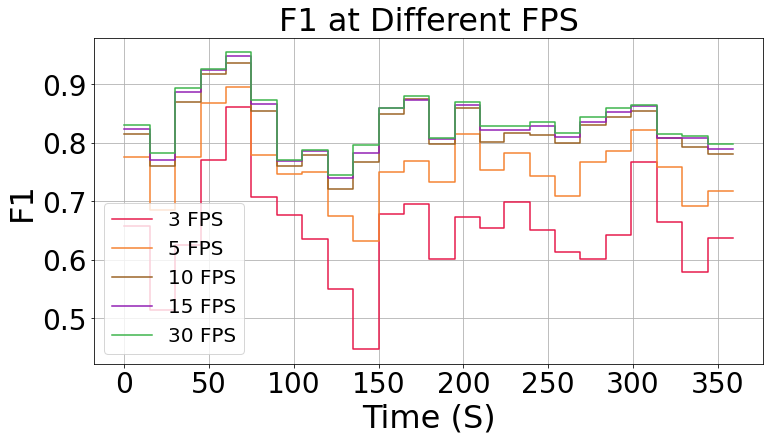

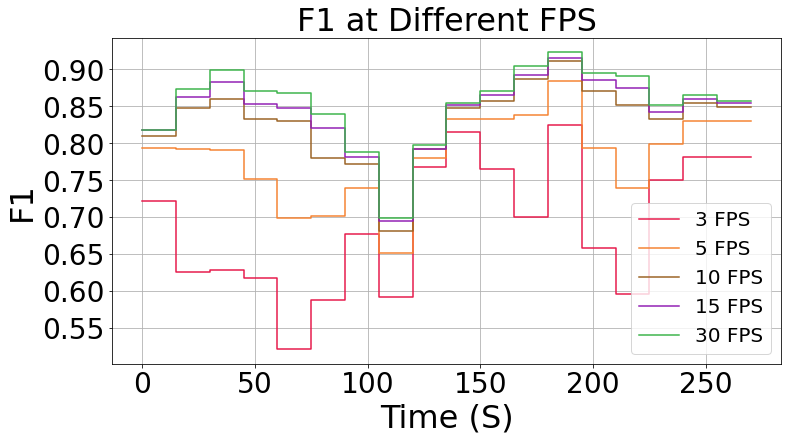

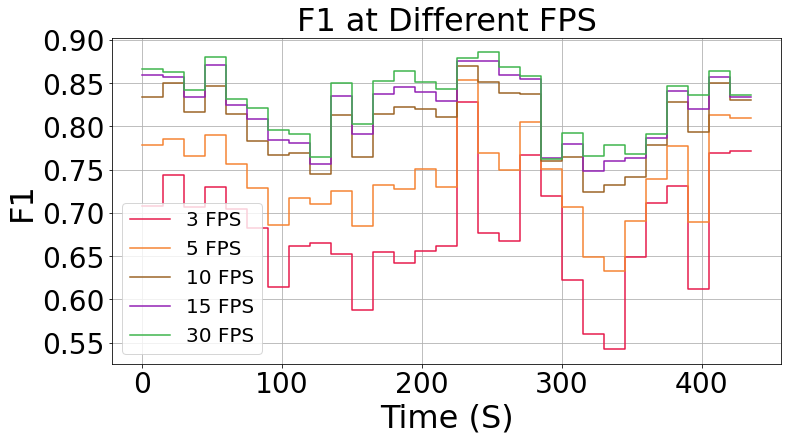

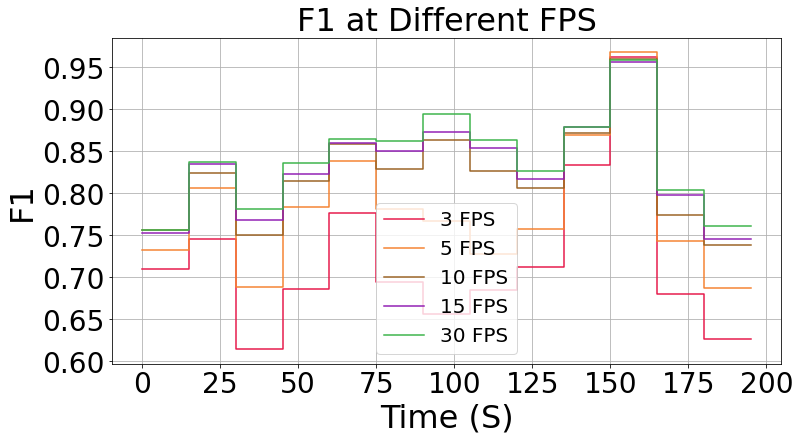

In [61]:
for result_dict_path in result_dict_paths:
    result_dict = load_json(result_dict_path)
    fpss = extract_fpss(result_dict)

    for class_idx in list(result_dict.keys()):
        accuracy = extract_metric_list_horizontal(result_dict[class_idx], fpss)
        time = extract_metric_time_horizontal(result_dict[class_idx])
        plot_mutiple_lines(time, accuracy, 'Time (S)', 'F1', 'F1 at Different FPS', True)